# Student Performance Analysis
### EDA MINOR-AUG 
- Numerical data : math scores , reading scores , writing scores
- categorical data : gender , race , parental level of education , lunch , test preparation course

In [2]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ds = pd.read_csv('student_performance.csv',sep=',')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [45]:
ds.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Trying to Analysis the data avalible

In [4]:
ds.gender.unique()

array(['female', 'male'], dtype=object)

In [5]:
ds['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [6]:
ds['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [28]:
ds['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [29]:
ds['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

## The below Graph says about the score relation with gender
- Understood that there are student's have scored 100 also.

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='writing score'>

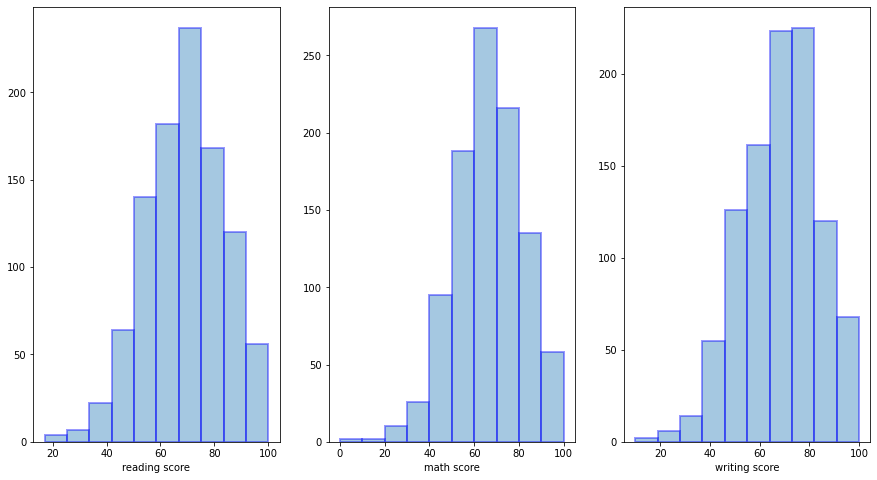

In [38]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
sns.distplot(ds['reading score'] , bins = 10,kde = False,hist = True,hist_kws = dict(edgecolor='b',linewidth = 2))
plt.subplot(1,3,2)
sns.distplot(ds['math score'] , bins = 10,kde = False,hist = True,hist_kws = dict(edgecolor='b',linewidth = 2))
plt.subplot(1,3,3)
sns.distplot(ds['writing score'] , bins = 10,kde = False,hist = True,hist_kws = dict(edgecolor='b',linewidth = 2))

##### By the boxplot we can say that there are many female with scores less than 20 compared to male students

<AxesSubplot:xlabel='gender', ylabel='math score'>

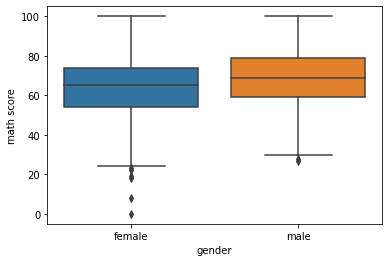

In [41]:
plt.title("math scores")
sns.boxplot(y = "math score",data = ds,x = "gender")

### The Below Bar Graph represents
male & female in who have score better ?
- In math we can see the male have score better than female i.e mostly 65 - 70
- In reading we can see the female have score better than male i.e mostly above 70
- In writing we can see the female have score better than male i.e mostly above 70

Let's find out  Why ? i think it might be for the test preparation course

<AxesSubplot:title={'center':'writing score'}, xlabel='gender', ylabel='writing score'>

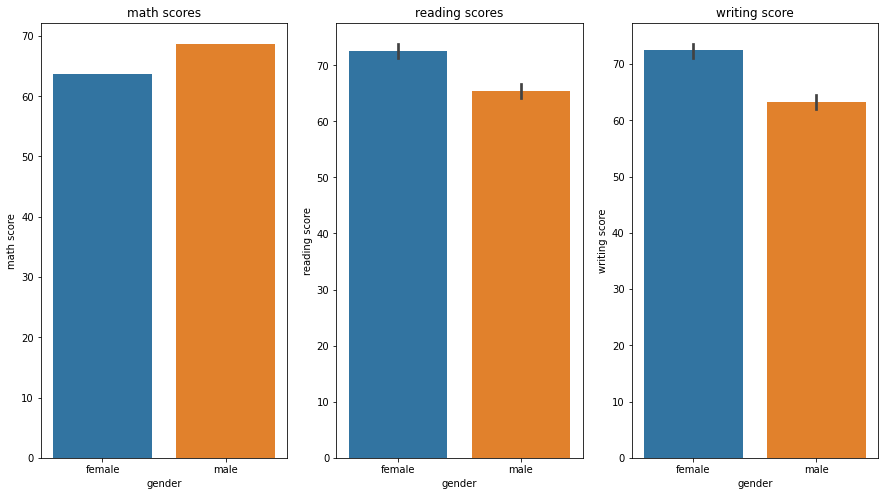

In [33]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.title("math scores")
sns.barplot(x = "gender" , y = "math score",data = ds,ci=None)
plt.subplot(1,3,2)
plt.title("reading scores")
sns.barplot(x = "gender"  , y = "reading score",data = ds)
plt.subplot(1,3,3)
plt.title("writing score")
sns.barplot(x = "gender"  , y = "writing score",data = ds)

## Below Graph Compares the test prep course vs scores of student
- In this i intially thought the test prep course can you some effects on the student score and they did.
- The student who took the test pre course shows a boost in the scores compared to student didn't take.
- Also found that the student who took the test prep course have scored better and much higher. I meant more than 70 marks 

Now i am thinking, it might be due better guidance at there home. so let's check there parent Qualifications.

<AxesSubplot:title={'center':'writing score'}, xlabel='test preparation course', ylabel='writing score'>

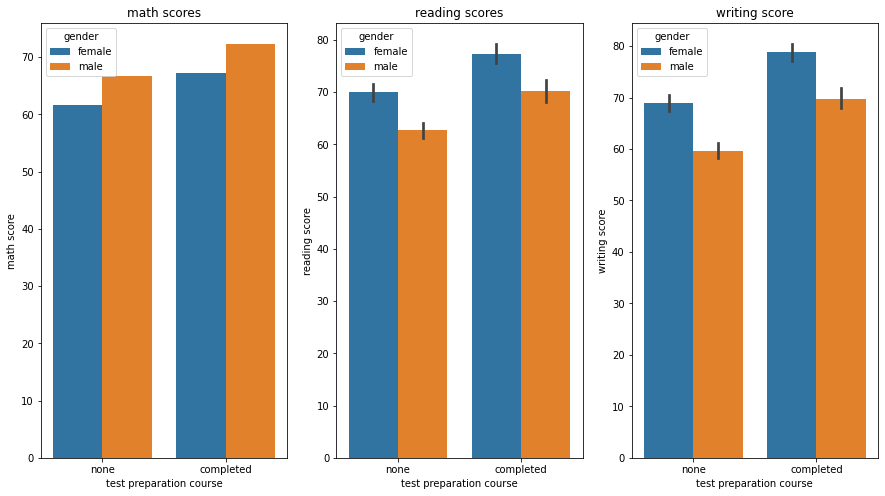

In [32]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.title("math scores")
sns.barplot(x = "test preparation course" , y = "math score",data = ds,hue="gender",ci=None)
plt.subplot(1,3,2)
plt.title("reading scores")
sns.barplot(x = "test preparation course" , y = "reading score",data = ds,hue="gender")
plt.subplot(1,3,3)
plt.title("writing score")
sns.barplot(x = "test preparation course" , y = "writing score",data = ds,hue="gender")

#### Found out that there are more female student than male in the dataset

<AxesSubplot:xlabel='gender', ylabel='count'>

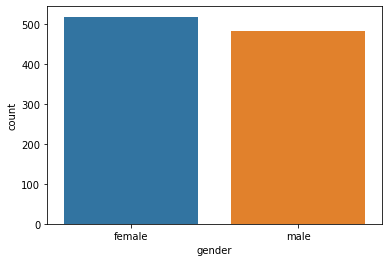

In [48]:
sns.countplot(x = "gender",data = ds)

### Trying to know the details and count of the parent's level of education

<AxesSubplot:xlabel='count', ylabel='parental level of education'>

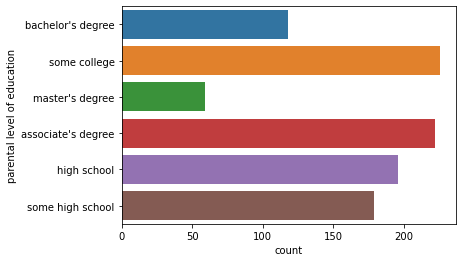

In [50]:
sns.countplot(y = "parental level of education",data = ds)

### Below Graph

- I have divide the above graph with gender to get more inside about the Data set

<AxesSubplot:xlabel='count', ylabel='gender'>

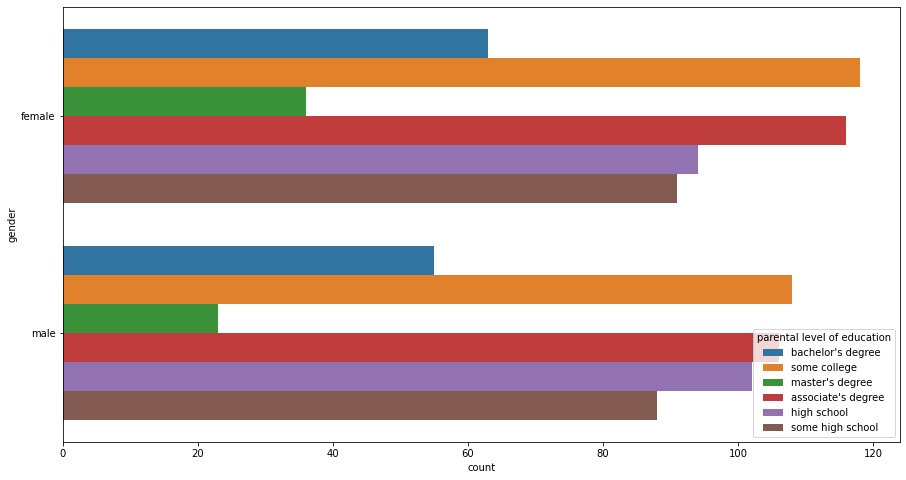

In [37]:
plt.figure(figsize=(15,8))
sns.countplot(y = "gender" , data = ds ,hue = "parental level of education")

### The below Graph Describes scores with the parent education level 
- The first thing i notice was the parent with master degree score better in math and leads the leaderboard the parent with bachelor's degree there sons/daughter have almost score equal but in the male student have done better.
- NOTICE that the parent with high school those student were not performing good as compared with other .

<AxesSubplot:xlabel='writing score', ylabel='parental level of education'>

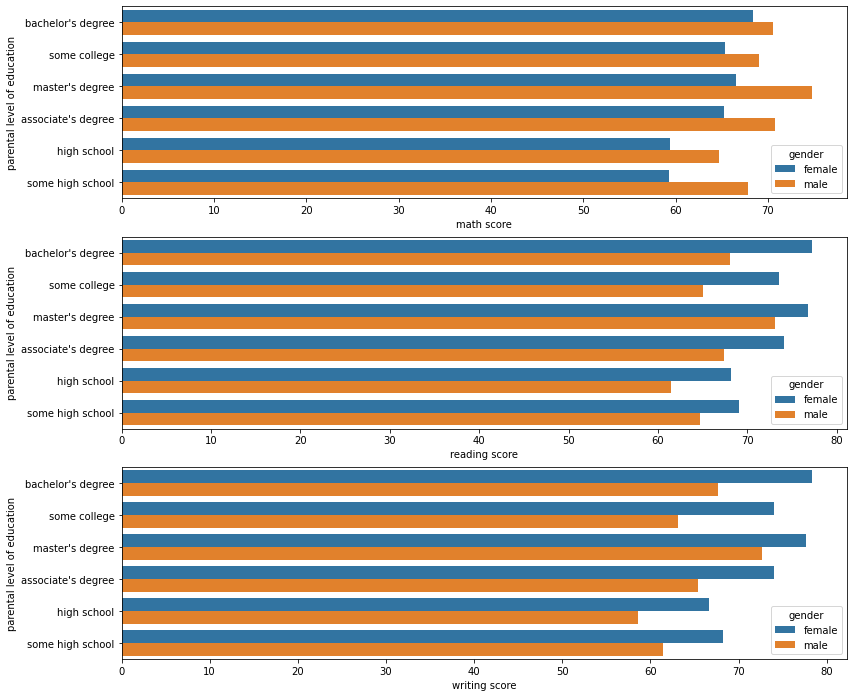

In [53]:
plt.figure(figsize=(13,12))
plt.subplot(3,1,1)
sns.barplot(x = "math score" , y = "parental level of education",data = ds,hue="gender",ci=None)
plt.subplot(3,1,2)
sns.barplot(x = "reading score" , y = "parental level of education",data = ds,hue="gender",ci=None)
plt.subplot(3,1,3)
sns.barplot(x = "writing score" , y = "parental level of education",data = ds,hue="gender",ci=None)


## In the below Graph
- Noticed that there are very less no of student with there parent education with master.
- The student mostly scored around 60 to 70

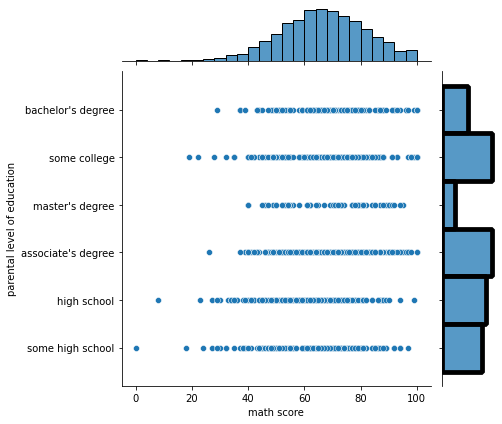

In [49]:
sns.jointplot(data = ds , y= "parental level of education", x = "math score")

### In the Below Graph
- there are extreme values too which might effect.


<AxesSubplot:xlabel='math score', ylabel='parental level of education'>

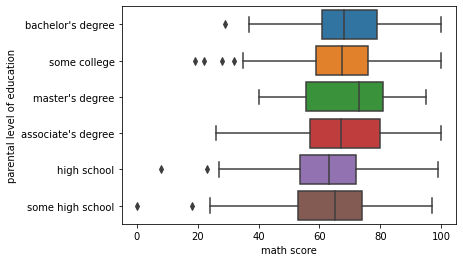

In [40]:
sns.boxplot(y = "parental level of education",data = ds,x = "math score")

### Tried to find any co-relation of the numerical data in the dataset

<AxesSubplot:>

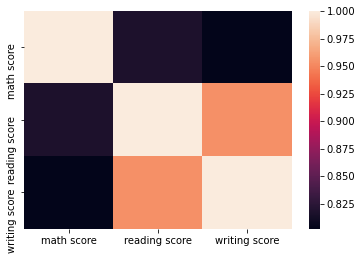

In [29]:
sns.heatmap(ds.corr())

## Below Graph
- Now I was think that the student with there parent's with high school scored less that other because of there lunch as the dataset doesn't have more field like fees and others.

Found Out 
- In the below graph i have found out that most of the student where having standard lunch so this can do an effect.

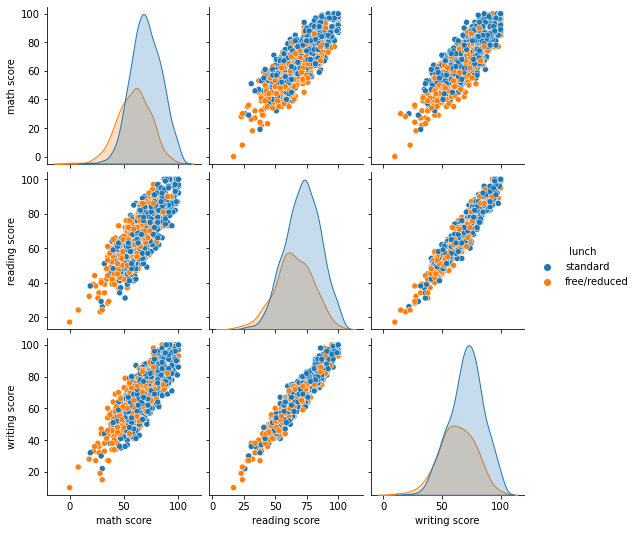

In [61]:
sns.pairplot(ds,hue = "lunch")

## Found out Something
### In the below graph
- the student with standard lunch were performing good. 
- The student with free lunch were not perfroming well.
- The other details can be understood in the pair plot above. I have understood that with free lunch the student aren't performing good.

Now I become more Curious It might a race which is effecting let's check

<AxesSubplot:xlabel='math score', ylabel='reading score'>

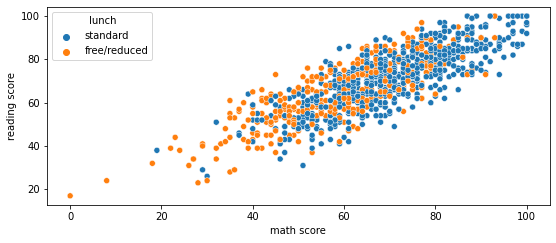

In [59]:
plt.figure(figsize=(9,8))
plt.subplot(2,1,2)
sns.scatterplot(data=ds,hue="lunch",x="math score",y="reading score")

## In the below graph
- The group c student are more than 300 and on 2nd with 260 we have group D 


<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

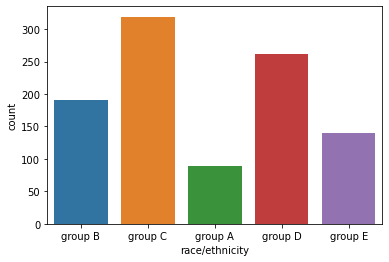

In [71]:
sns.countplot(data = ds,x = "race/ethnicity")

## In The below graph unable to understand properly.

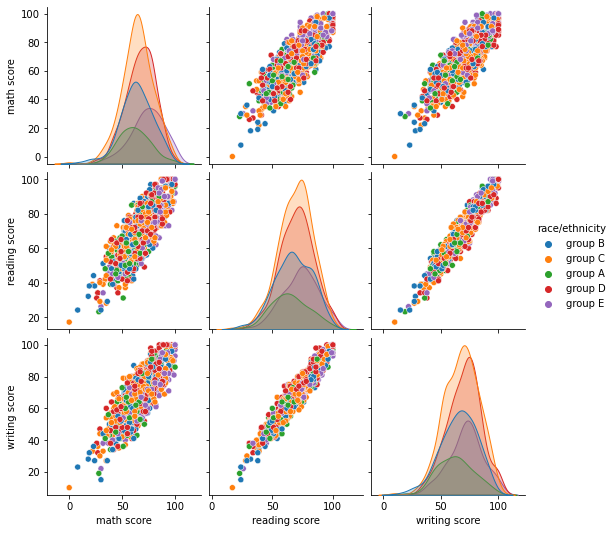

In [61]:
sns.pairplot(data = ds, hue="race/ethnicity")

## In the below Graph
- In the below graph we can see the group E have done really good in all.
- Even there are very less group A student they have perform good 

<AxesSubplot:xlabel='race/ethnicity', ylabel='writing score'>

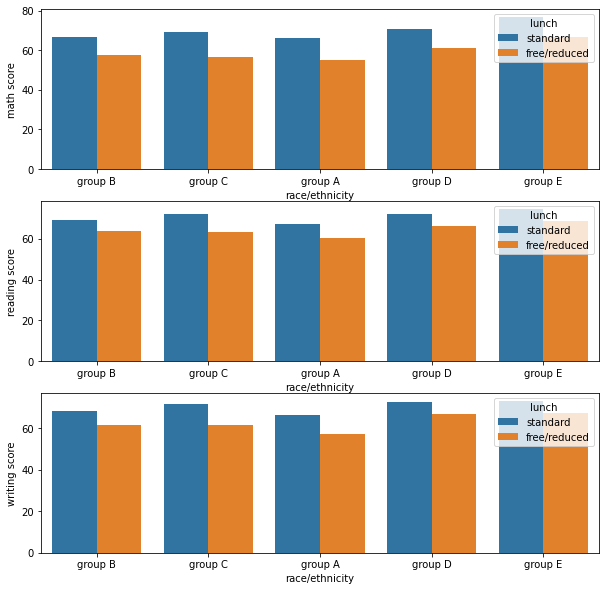

In [67]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.barplot(data = ds,y = "math score" , x = "race/ethnicity",hue = "lunch",ci = None)
plt.subplot(3,1,2)
sns.barplot(data = ds,y = "reading score" , x = "race/ethnicity",hue = "lunch",ci = None)
plt.subplot(3,1,3)
sns.barplot(data = ds,y = "writing score" , x = "race/ethnicity",hue = "lunch",ci = None)


<AxesSubplot:xlabel='math score', ylabel='reading score'>

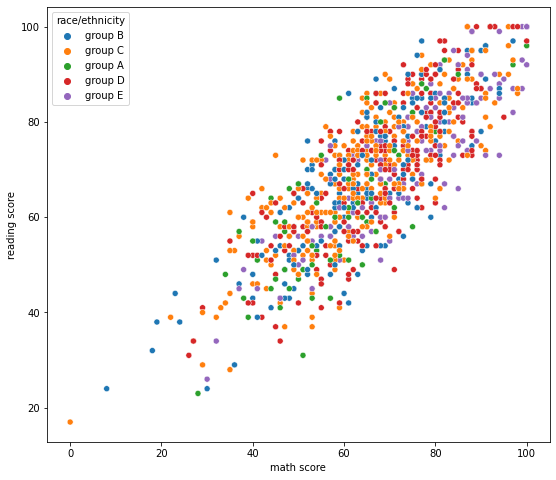

In [70]:
plt.figure(figsize=(9,8))
sns.scatterplot(data=ds,hue="race/ethnicity",x="math score",y="reading score")


## The below graph shows the relation of gender and scores and race
- In this also Group E male student have done better in math and Female of group E have done better in reading and writing

<AxesSubplot:xlabel='race/ethnicity', ylabel='writing score'>

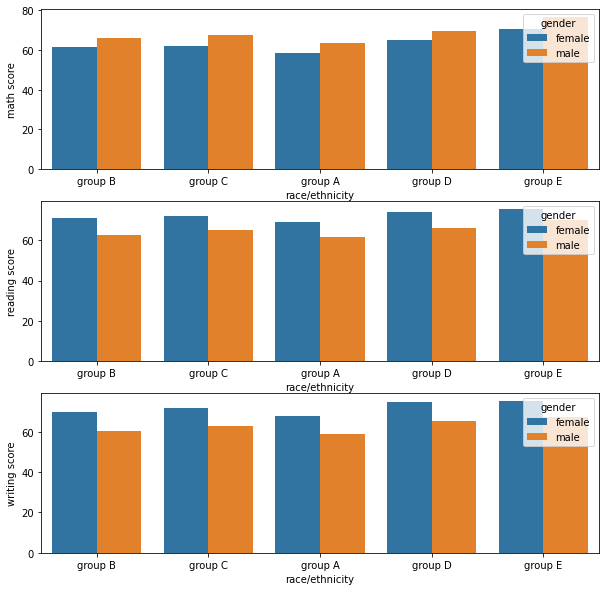

In [72]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.barplot(data = ds,y = "math score" , x = "race/ethnicity",hue = "gender",ci = None)
plt.subplot(3,1,2)
sns.barplot(data = ds,y = "reading score" , x = "race/ethnicity",hue = "gender",ci = None)
plt.subplot(3,1,3)
sns.barplot(data = ds,y = "writing score" , x = "race/ethnicity",hue = "gender",ci = None)


# Conclusion
- Female student are good at reading and writing and Male student are good at math
- The student with test prep course have score better than student who didn't take the course.
- The parent with high school there student were not performing good compared to other.
- The student with free lunch gets less marks in all(math score , reading score , writing score).
- In the last the student with group E were good at all scores mostly the standard lunch did better than free lunch.


My Conclusion is The female student were good at Reading and writing , on ther otherhand male student were good with math
